Nama: Muhammad Raja Fadhil Habib  
NIM: 24060122140131  
LAB: C1


In [18]:
# Import libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Scikit-learn modules
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


MEMUAT DATASET

In [29]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)



In [26]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
dataset = pd.read_csv(url, header=None)


Menentukan Dimensi dari dataset

In [30]:
print(dataset.shape)

(150, 5)


Melihat isi Dataset

In [31]:
print(dataset.head(20))

    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

Distribusi Kelas Data

In [32]:
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


Ringkasan Statistik

In [33]:
print (dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


Visualisasi Data Menggunakan plot univariat

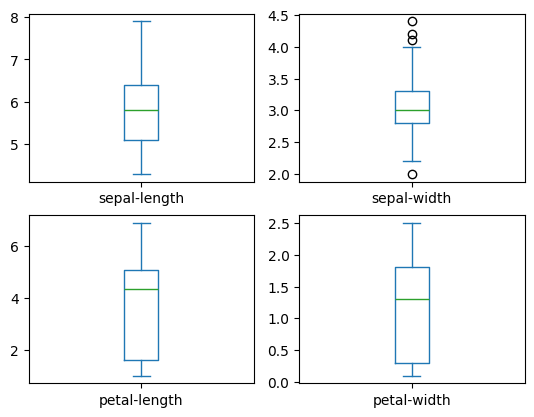

In [34]:
import matplotlib.pyplot as plt
dataset.plot(kind='box', subplots=True, layout =(2,2), sharex = False, sharey = False)
plt.show()

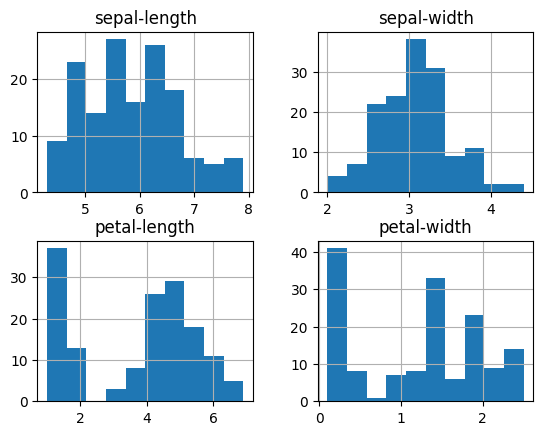

In [35]:
dataset.hist()
plt.show()

visualisasi data menggunakan plot multivariat

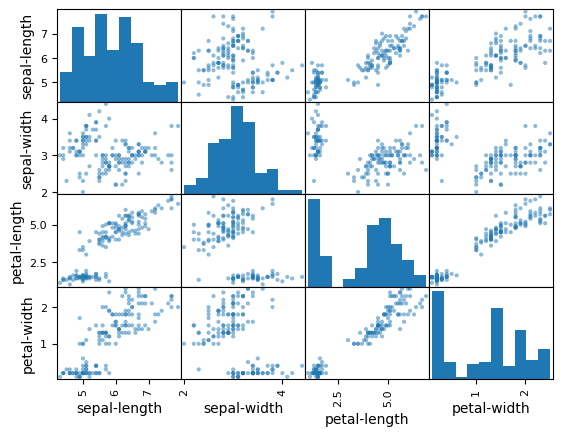

In [36]:
import pandas
from pandas.plotting import scatter_matrix
scatter_matrix(dataset)
plt.show()

#EVALUASI ALGORITMA

In [37]:
from sklearn.model_selection import train_test_split

# split out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7

# gunakan train_test_split secara langsung
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)


In [38]:
# melihat perbandingan jumlah data training dan validasi
X_train.shape, X_validation.shape

((120, 4), (30, 4))

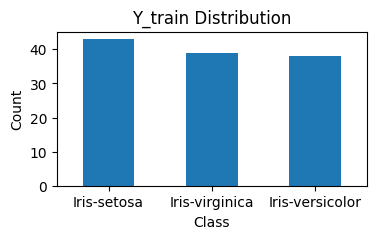

In [39]:
#Melihat persebaran label data training
y_train_series = pd.Series(Y_train)
y_train_series.value_counts().plot(kind='bar', figsize=(4, 2), title="Y_train Distribution")
plt.xticks(rotation=0)
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

K Folds cross validation

In [40]:
#test options and evaluation metric
seed = 7
scoring = 'accuracy'

Membangun Model

In [41]:
#spot check algorithms
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [42]:
# Evaluasi setiap model secara bergantian
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.983333 (0.033333)
NB: 0.966667 (0.040825)
SVM: 0.983333 (0.033333)


Memilih Model Terbaik

In [43]:
# Make predictions on validation dataset
svm = SVC()

svm.fit(X_train, Y_train)

predictions = svm.predict(X_validation)

print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8666666666666667
[[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.83      0.83      0.83        12
 Iris-virginica       0.82      0.82      0.82        11

       accuracy                           0.87        30
      macro avg       0.88      0.88      0.88        30
   weighted avg       0.87      0.87      0.87        30



Hasil evaluasi model Support Vector Machine (SVM) menunjukkan bahwa model memiliki akurasi keseluruhan sebesar 86,67%, yang berarti 26 dari 30 sampel dalam data validasi berhasil diklasifikasikan dengan benar. Berdasarkan confusion matrix, semua 7 sampel `Iris-setosa` diklasifikasikan dengan benar, menunjukkan performa sempurna untuk kelas ini. Untuk kelas `Iris-versicolor`, dari total 12 sampel, 10 diklasifikasikan dengan benar, sementara 2 sampel salah diklasifikasikan sebagai `Iris-virginica`. Pada kelas `Iris-virginica`, dari total 11 sampel, 9 diklasifikasikan dengan benar, tetapi 2 sampel salah diklasifikasikan sebagai `Iris-versicolor`.

Berdasarkan classification report, kelas `Iris-setosa` memiliki precision, recall, dan F1-score sebesar 1.00, menunjukkan bahwa model sangat akurat dalam mengenali kelas ini tanpa ada kesalahan. Untuk kelas `Iris-versicolor`, precision, recall, dan F1-score masing-masing adalah 0.83, yang mencerminkan kesulitan model dalam membedakan beberapa sampel dari `Iris-virginica`. Begitu pula untuk kelas `Iris-virginica`, precision, recall, dan F1-score masing-masing adalah 0.82, menunjukkan beberapa kebingungan dengan `Iris-versicolor`.

Secara keseluruhan, nilai rata-rata precision, recall, dan F1-score masing-masing adalah 0.88, yang mencerminkan performa model yang cukup baik untuk dataset ini. Namun, ada sedikit kesalahan dalam membedakan kelas `Iris-versicolor` dan `Iris-virginica`, yang mungkin disebabkan oleh kemiripan fitur antara kedua kelas tersebut. Model ini sangat andal untuk `Iris-setosa` dan cukup baik untuk kedua kelas lainnya. Dengan pengoptimalan hyperparameter lebih lanjut, performa untuk kelas `Iris-versicolor` dan `Iris-virginica` dapat ditingkatkan.

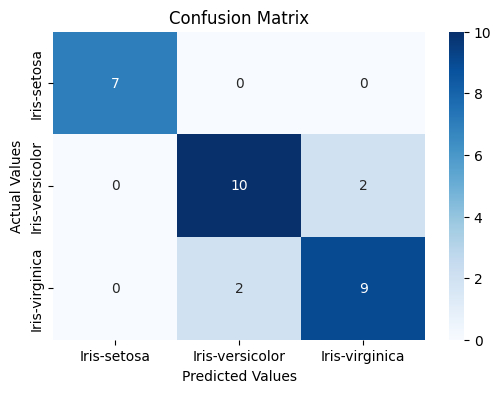

In [52]:
cm = confusion_matrix(Y_validation, predictions)
# Pastikan nama kelas diambil dari Y_train atau hasil unik dari Y_validation
classes = np.unique(Y_validation)  # Mengambil semua kelas unik dari data validasi

# Buat DataFrame confusion matrix untuk mempermudah visualisasi
cm_df = pd.DataFrame(cm, index=classes, columns=classes)

# Visualisasi confusion matrix menggunakan Seaborn
plt.figure(figsize=(6, 4))  # Tentukan ukuran plot
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", cbar=True)  # Heatmap confusion matrix
plt.title("Confusion Matrix")  # Tambahkan judul
plt.ylabel("Actual Values")  # Label sumbu Y
plt.xlabel("Predicted Values")  # Label sumbu X
plt.show()  # Tampilkan plot

Confusion matrix yang ditampilkan menunjukkan performa model dalam mengklasifikasikan tiga kelas bunga Iris, yaitu Iris-setosa, Iris-versicolor, dan Iris-virginica. Dari hasil tersebut, terlihat bahwa model sangat akurat dalam mengklasifikasikan kelas Iris-setosa, dengan semua 7 sampel diklasifikasikan dengan benar tanpa kesalahan. Untuk kelas Iris-versicolor, model berhasil mengklasifikasikan 10 sampel dengan benar, tetapi terdapat 2 sampel yang salah diklasifikasikan sebagai Iris-virginica. Begitu pula untuk kelas Iris-virginica, terdapat 9 sampel yang benar diklasifikasikan, sementara 2 sampel salah diklasifikasikan sebagai Iris-versicolor. Secara keseluruhan, model menunjukkan akurasi yang baik dengan akurasi total 86,67%. Namun, ada sedikit kebingungan antara kelas Iris-versicolor dan Iris-virginica, yang mengindikasikan model mungkin memerlukan peningkatan lebih lanjut, seperti tuning hyperparameter atau penggunaan model alternatif untuk meningkatkan presisi dan recall pada kedua kelas tersebut.

Evaluasi KNN (K-Nearest Neighbors):

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Model KNN
model_knn = KNeighborsClassifier()

# Evaluasi KNN menggunakan 10-fold cross-validation
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
cv_results_knn = cross_val_score(model_knn, X_train, Y_train, cv=kfold, scoring='accuracy')

# Menampilkan hasil cross-validation KNN
print(f"KNN: {cv_results_knn.mean()} ({cv_results_knn.std()})")

# Melatih model KNN
model_knn.fit(X_train, Y_train)

# Prediksi menggunakan data validasi
predictions_knn = model_knn.predict(X_validation)

# Evaluasi hasil prediksi KNN
print(f"Akurasi KNN: {accuracy_score(Y_validation, predictions_knn)}")
print("Confusion Matrix KNN:")
print(confusion_matrix(Y_validation, predictions_knn))
print("Classification Report KNN:")
print(classification_report(Y_validation, predictions_knn))


KNN: 0.9833333333333332 (0.03333333333333335)
Akurasi KNN: 0.9
Confusion Matrix KNN:
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
Classification Report KNN:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



Hasil evaluasi model K-Nearest Neighbors (KNN) menunjukkan performa yang sangat baik, dengan akurasi cross-validation sebesar 98,33% dan akurasi pada data validasi sebesar 90%. Dari confusion matrix, terlihat bahwa semua 7 sampel `Iris-setosa` diklasifikasikan dengan benar (100% akurat). Untuk kelas `Iris-versicolor`, dari total 12 sampel, 11 diklasifikasikan dengan benar, sementara 1 sampel salah diklasifikasikan sebagai `Iris-virginica`. Pada kelas `Iris-virginica`, dari total 11 sampel, 9 diklasifikasikan dengan benar, tetapi 2 sampel salah diklasifikasikan sebagai `Iris-versicolor`.

Berdasarkan classification report, kelas `Iris-setosa` memiliki precision, recall, dan F1-score sebesar 1.00, yang menunjukkan performa sempurna untuk kelas ini. Kelas `Iris-versicolor` memiliki precision sebesar 0.85 dan recall sebesar 0.92, yang mencerminkan model cukup baik dalam mengenali kelas ini, dengan hanya satu kesalahan. Untuk kelas `Iris-virginica`, precision sebesar 0.90 dan recall sebesar 0.82 menunjukkan bahwa model masih memiliki beberapa kesalahan dalam membedakan kelas ini dari `Iris-versicolor`.

Secara keseluruhan, rata-rata precision, recall, dan F1-score masing-masing adalah sekitar 0.91, yang mencerminkan performa model yang sangat baik pada dataset ini. Model KNN unggul dalam mengenali kelas `Iris-setosa`, sedangkan beberapa kesalahan kecil masih terjadi antara kelas `Iris-versicolor` dan `Iris-virginica`. Performa ini menunjukkan bahwa KNN adalah model yang andal untuk dataset ini, dengan akurasi yang hampir mendekati sempurna. Dengan pengoptimalan lebih lanjut, misalnya dengan tuning hyperparameter seperti nilai `k`, akurasi untuk kelas yang sulit dapat ditingkatkan.

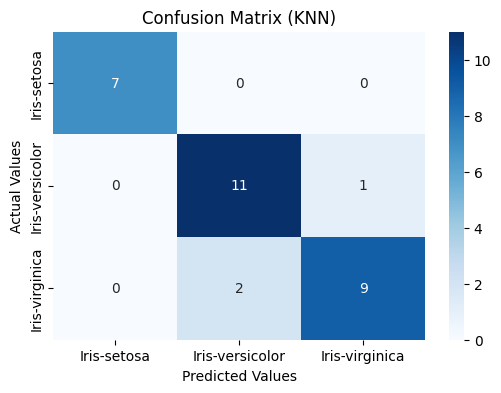

In [56]:
# Membuat confusion matrix
cm_knn = confusion_matrix(Y_validation, predictions_knn)
# Visualisasi confusion matrix menggunakan Seaborn
classes = np.unique(Y_train)  # Mengambil semua kelas unik
cm_df_knn = pd.DataFrame(cm_knn, index=classes, columns=classes)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_df_knn, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.title("Confusion Matrix (KNN)")
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

Hasil confusion matrix untuk model K-Nearest Neighbors (KNN) menunjukkan performa model dalam mengklasifikasikan tiga kelas bunga Iris, yaitu `Iris-setosa`, `Iris-versicolor`, dan `Iris-virginica`. Dari confusion matrix, terlihat bahwa semua 7 sampel `Iris-setosa` diklasifikasikan dengan benar, yang menunjukkan bahwa model memiliki akurasi sempurna untuk kelas ini. Untuk kelas `Iris-versicolor`, dari total 12 sampel, 11 diklasifikasikan dengan benar sebagai `Iris-versicolor`, sementara 1 sampel salah diklasifikasikan sebagai `Iris-virginica`. Pada kelas `Iris-virginica`, terdapat 9 prediksi benar dari total 11 sampel, sementara 2 sampel salah diklasifikasikan sebagai `Iris-versicolor`.

Secara keseluruhan, model KNN menunjukkan performa yang sangat baik, terutama untuk kelas `Iris-setosa` dan `Iris-versicolor`, dengan kesalahan kecil pada kelas `Iris-virginica`. Namun, masih ada kebingungan antara kelas `Iris-virginica` dan `Iris-versicolor`, yang menyebabkan beberapa sampel salah diklasifikasikan di antara kedua kelas tersebut. Hal ini mungkin disebabkan oleh kemiripan karakteristik fitur antara kedua kelas tersebut. Model ini dapat dikatakan cukup andal dengan akurasi yang mendekati sempurna, meskipun ada ruang untuk perbaikan dalam meningkatkan presisi pada kelas `Iris-virginica`.

EVALUASI NB (Gaussian Naive Bayes)

In [57]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Model Naive Bayes
model_nb = GaussianNB()

# Evaluasi Naive Bayes menggunakan 10-fold cross-validation
cv_results_nb = cross_val_score(model_nb, X_train, Y_train, cv=kfold, scoring='accuracy')

# Menampilkan hasil cross-validation NB
print(f"NB: {cv_results_nb.mean()} ({cv_results_nb.std()})")

# Melatih model Naive Bayes
model_nb.fit(X_train, Y_train)

# Prediksi menggunakan data validasi
predictions_nb = model_nb.predict(X_validation)

# Evaluasi hasil prediksi NB
print(f"Akurasi NB: {accuracy_score(Y_validation, predictions_nb)}")
print("Confusion Matrix NB:")
print(confusion_matrix(Y_validation, predictions_nb))
print("Classification Report NB:")
print(classification_report(Y_validation, predictions_nb))


NB: 0.9666666666666666 (0.04082482904638632)
Akurasi NB: 0.8333333333333334
Confusion Matrix NB:
[[7 0 0]
 [0 9 3]
 [0 2 9]]
Classification Report NB:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.82      0.75      0.78        12
 Iris-virginica       0.75      0.82      0.78        11

       accuracy                           0.83        30
      macro avg       0.86      0.86      0.86        30
   weighted avg       0.84      0.83      0.83        30



Hasil evaluasi model Naive Bayes (NB) menunjukkan performa yang baik dengan akurasi cross-validation sebesar 96,67% dan akurasi pada data validasi sebesar 83,33%. Dari confusion matrix, terlihat bahwa semua 7 sampel `Iris-setosa` diklasifikasikan dengan benar, menunjukkan performa sempurna untuk kelas ini. Untuk kelas `Iris-versicolor`, dari total 12 sampel, 9 diklasifikasikan dengan benar, sementara 3 sampel salah diklasifikasikan sebagai `Iris-virginica`. Pada kelas `Iris-virginica`, dari total 11 sampel, 9 diklasifikasikan dengan benar, tetapi 2 sampel salah diklasifikasikan sebagai `Iris-versicolor`.

Berdasarkan classification report, kelas `Iris-setosa` memiliki precision, recall, dan F1-score sebesar 1.00, menunjukkan bahwa model sangat akurat dalam mengenali kelas ini. Kelas `Iris-versicolor` memiliki precision sebesar 0.82 dan recall sebesar 0.75, menunjukkan bahwa model cukup baik dalam mengenali kelas ini, meskipun ada beberapa kesalahan. Untuk kelas `Iris-virginica`, precision sebesar 0.75 dan recall sebesar 0.82 mengindikasikan bahwa model cukup sering salah mengklasifikasikan kelas ini sebagai `Iris-versicolor`.

Secara keseluruhan, rata-rata precision dan recall adalah 0.86, yang menunjukkan bahwa model memiliki performa yang baik tetapi tidak sebaik KNN atau SVM. Kesalahan utama model Naive Bayes terjadi dalam membedakan antara `Iris-versicolor` dan `Iris-virginica`, yang mungkin disebabkan oleh asumsi independensi fitur yang digunakan dalam algoritma Naive Bayes. Model ini sangat efektif untuk kelas `Iris-setosa` tetapi memiliki ruang untuk perbaikan dalam mengenali kelas lainnya. Pengoptimalan lebih lanjut atau penggunaan model yang lebih kompleks mungkin diperlukan untuk meningkatkan performa keseluruhan.

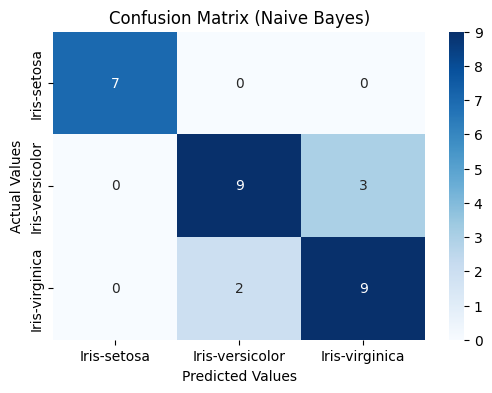

In [58]:
# Membuat confusion matrix untuk NB
cm_nb = confusion_matrix(Y_validation, predictions_nb)

# Visualisasi confusion matrix menggunakan Seaborn
classes = np.unique(Y_train)  # Mengambil semua kelas unik
cm_df_nb = pd.DataFrame(cm_nb, index=classes, columns=classes)

plt.figure(figsize=(6, 4))  # Mengatur ukuran plot
sns.heatmap(cm_df_nb, annot=True, fmt="d", cmap="Blues", cbar=True)  # Membuat heatmap
plt.title("Confusion Matrix (Naive Bayes)")  # Menambahkan judul
plt.ylabel("Actual Values")  # Label sumbu Y
plt.xlabel("Predicted Values")  # Label sumbu X
plt.show()  # Menampilkan plot


Hasil evaluasi model Naive Bayes (NB) berdasarkan confusion matrix menunjukkan performa model dalam mengklasifikasikan tiga kelas bunga Iris: Iris-setosa, Iris-versicolor, dan Iris-virginica. Dari confusion matrix, terlihat bahwa semua 7 sampel Iris-setosa berhasil diklasifikasikan dengan benar (100% akurat). Untuk kelas Iris-versicolor, dari total 12 sampel, 9 diklasifikasikan dengan benar, sedangkan 3 sampel salah diklasifikasikan sebagai Iris-virginica. Pada kelas Iris-virginica, dari total 11 sampel, 9 diklasifikasikan dengan benar, tetapi 2 sampel salah diklasifikasikan sebagai Iris-versicolor.

Secara keseluruhan, model memiliki akurasi sebesar 83,33% pada data validasi. Kelas Iris-setosa memiliki performa sempurna dengan precision, recall, dan F1-score masing-masing sebesar 1.00. Namun, performa menurun untuk kelas lainnya. Pada kelas Iris-versicolor, precision adalah 0.82 dan recall 0.75, yang menunjukkan model sedikit kesulitan membedakan kelas ini dari Iris-virginica. Sebaliknya, pada kelas Iris-virginica, precision adalah 0.75 dan recall 0.82, menunjukkan model cukup sering salah mengklasifikasikan kelas ini sebagai Iris-versicolor.

Dari hasil ini, dapat disimpulkan bahwa model Naive Bayes bekerja dengan sangat baik pada kelas Iris-setosa, namun kurang optimal dalam membedakan antara Iris-versicolor dan Iris-virginica. Hal ini mungkin disebabkan oleh kemiripan karakteristik fitur antara kedua kelas tersebut. Meskipun demikian, model ini memiliki performa yang cukup andal untuk dataset ini, dengan metrik rata-rata (precision dan recall) yang cukup tinggi.

### Kesimpulan Hasil Evaluasi Ketiga Algoritma

Berdasarkan hasil evaluasi ketiga algoritma (**SVM**, **KNN**, dan **Naive Bayes**) pada dataset bunga Iris, dapat disimpulkan sebagai berikut:

1. **Support Vector Machine (SVM)**:
   - SVM memiliki akurasi validasi sebesar **86,67%**, dengan rata-rata precision, recall, dan F1-score masing-masing sebesar **88%**.
   - SVM menunjukkan performa sempurna pada kelas `Iris-setosa` dengan precision dan recall sebesar 1.00. Namun, terdapat beberapa kesalahan kecil dalam membedakan antara `Iris-versicolor` dan `Iris-virginica`.
   - Model ini sangat andal dan memberikan hasil yang konsisten, meskipun tidak seakurat KNN.

2. **K-Nearest Neighbors (KNN)**:
   - KNN memiliki performa terbaik dengan akurasi validasi sebesar **90%** dan akurasi cross-validation sebesar **98,33%**.
   - Sama seperti SVM, KNN bekerja sempurna pada kelas `Iris-setosa` (precision, recall, dan F1-score = 1.00). Namun, untuk kelas `Iris-versicolor` dan `Iris-virginica`, terdapat sedikit kesalahan, meskipun precision dan recall tetap tinggi.
   - KNN memberikan hasil yang sangat baik dan lebih stabil dibandingkan Naive Bayes, menunjukkan bahwa algoritma ini sangat cocok untuk dataset ini.

3. **Naive Bayes (NB)**:
   - Naive Bayes memiliki performa terendah dengan akurasi validasi sebesar **83,33%** dan akurasi cross-validation sebesar **96,67%**.
   - Model ini sempurna dalam mengenali kelas `Iris-setosa` (precision dan recall = 1.00), tetapi memiliki kesulitan dalam membedakan antara `Iris-versicolor` dan `Iris-virginica`, yang terlihat dari precision dan recall yang lebih rendah untuk kedua kelas ini.
   - Meskipun performa keseluruhannya lebih rendah dibandingkan SVM dan KNN, model ini tetap cukup andal dan bekerja dengan baik untuk dataset kecil seperti Iris.

### **Rekomendasi:**
- Berdasarkan hasil evaluasi, **KNN** adalah algoritma dengan performa terbaik untuk dataset ini karena memiliki akurasi validasi tertinggi dan kemampuan yang sangat baik dalam membedakan setiap kelas.
- **SVM** juga merupakan pilihan yang sangat baik dengan performa stabil dan akurasi yang mendekati KNN, serta mungkin lebih cocok untuk dataset dengan dimensi yang lebih tinggi.
- **Naive Bayes** menunjukkan performa yang baik namun lebih sederhana, sehingga dapat dipertimbangkan jika efisiensi komputasi menjadi prioritas.

Jika tujuan utama adalah akurasi tertinggi, **KNN** adalah pilihan terbaik untuk dataset bunga Iris ini. Namun, untuk dataset dengan karakteristik berbeda, SVM atau NB mungkin lebih cocok bergantung pada kompleksitas data.